In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
# --- 1. Hypothesis ---
# Let's hypothesize that there is a positive linear relationship between
# an independent variable 'X' (e.g., years of experience) and a dependent
# variable 'y' (e.g., salary).
# Hypothesis: As X increases, y also tends to increase in a linear fashion.


# We'll create synthetic data that roughly follows our hypothesis.
np.random.seed(42) # for reproducibility
X_data_points = 2 * np.random.rand(100, 1) + 3  # Independent variable (e.g., experience from 3 to 5, scaled)
# y = true_slope * X + true_intercept + noise
y_data_points = 4 + 3 * X_data_points + np.random.randn(100, 1) * 2 # Dependent variable (e.g., salary)

# Create a Pandas DataFrame for easier manipulation and visualization
data = pd.DataFrame(data=X_data_points, columns=['X_feature'])
data['y_target'] = y_data_points

print("--- First 5 rows of the generated dataset: ---")
print(data.head())
print("\n")

--- First 5 rows of the generated dataset: ---
   X_feature   y_target
0   3.749080  15.421335
1   4.901429  18.106271
2   4.463988  17.575485
3   4.197317  12.616813
4   3.312037  13.496768




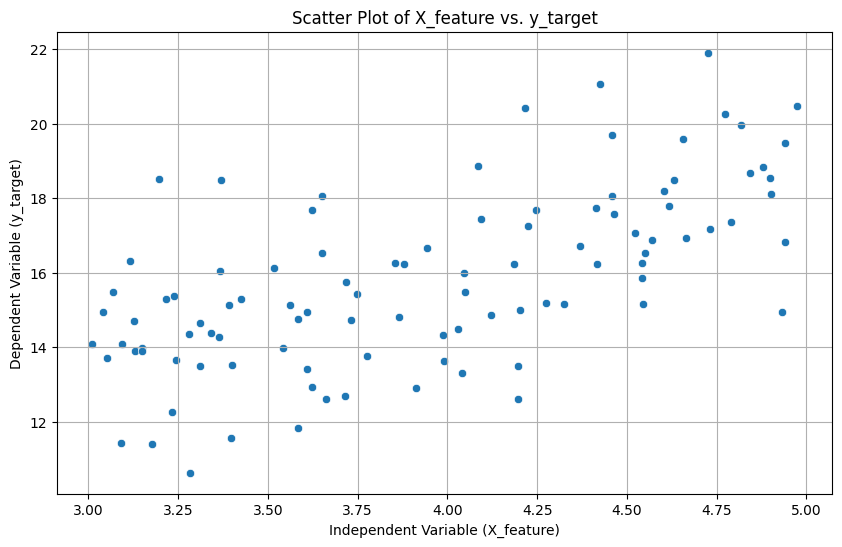

In [5]:
# Hypothesis Validation (Exploratory Data Analysis - EDA) - Scatter Plot
# We'll visually inspect the data to see if our hypothesis seems plausible.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='X_feature', y='y_target', data=data)
plt.title('Scatter Plot of X_feature vs. y_target')
plt.xlabel('Independent Variable (X_feature)')
plt.ylabel('Dependent Variable (y_target)')
plt.grid(True)
plt.show()
# Observation: The scatter plot should show a general upward trend,
# suggesting a positive linear relationship, thus supporting our initial hypothesis.

In [6]:
# Hypothesis Validation (Exploratory Data Analysis - EDA) - Correlation Matrix
correlation_matrix = data.corr()
print("--- Correlation Matrix: ---")
print(correlation_matrix)
print("\n")
# Observation: The correlation coefficient between X_feature and y_target should be
# significantly positive (close to 1), further supporting the linear relationship.


--- Correlation Matrix: ---
           X_feature  y_target
X_feature   1.000000  0.641939
y_target    0.641939  1.000000




In [7]:
# Data Preparation
# In scikit-learn, the features (X) and target (y) need to be separated.
# X should be a 2D array (or DataFrame), and y should be a 1D array (or Series).

X_skl = data[['X_feature']] # Features (independent variable)
y_skl = data['y_target']   # Target (dependent variable)

print("--- Data prepared for scikit-learn: ---")
print("X_skl shape:", X_skl.shape)
print("y_skl shape:", y_skl.shape)


--- Data prepared for scikit-learn: ---
X_skl shape: (100, 1)
y_skl shape: (100,)


In [8]:
# Train-Test Split
# We split the dataset into a training set and a testing set.
# The model will learn from the training set and be evaluated on the unseen testing set.
# test_size=0.2 means 20% of the data will be used for testing, and 80% for training.
# random_state ensures that the split is the same every time we run the code, for reproducibility.

X_train, X_test, y_train, y_test = train_test_split(X_skl, y_skl, test_size=0.2, random_state=42)

print("--- Shapes of the datasets after split: ---")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("\n")

--- Shapes of the datasets after split: ---
X_train shape: (80, 1)
X_test shape: (20, 1)
y_train shape: (80,)
y_test shape: (20,)




In [9]:
# Model Building and Training
# We create an instance of the LinearRegression model and fit it to our training data.
# This is where the model learns the relationship between X_train and y_train
# by finding the optimal coefficient (slope) and intercept.

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# After training, the model has learned the parameters:
print("--- Model Parameters: ---")
print("Intercept (theta_0 or b_0):", linear_reg_model.intercept_)
print("Coefficient (theta_1 or b_1 for X_feature):", linear_reg_model.coef_)
print("\n")
# The equation of the learned line will be: y = coef_ * X + intercept_

--- Model Parameters: ---
Intercept (theta_0 or b_0): 5.489884694035478
Coefficient (theta_1 or b_1 for X_feature): [2.59864731]




In [10]:
# Making Predictions
# Now we use the trained model to make predictions on the test set (X_test).
# We can also predict on the training data for comparison if needed.

y_pred_test = linear_reg_model.predict(X_test)
y_pred_train = linear_reg_model.predict(X_train)

print("--- Predictions made. First 5 test predictions: ---")
print(y_pred_test[:5])
print("\n")

--- Predictions made. First 5 test predictions: ---
[13.61615811 17.93650802 17.29941023 16.72915015 14.63078245]




In [11]:
# Model Evaluation
# We evaluate the performance of our model on the test set.

print("--- Model Evaluation on Test Set: ---")
# Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared (Coefficient of Determination)
# R-squared indicates the proportion of the variance in the dependent variable
# that is predictable from the independent variable(s).
# It ranges from 0 to 1; a higher value generally indicates a better fit.
r2 = metrics.r2_score(y_test, y_pred_test)
print("R-squared (Coefficient of Determination):", r2)
print("\n")

--- Model Evaluation on Test Set: ---
Mean Absolute Error (MAE): 1.182685155837956
Mean Squared Error (MSE): 2.614798054868012
Root Mean Squared Error (RMSE): 1.6170337210052275
R-squared (Coefficient of Determination): 0.42031372898196995




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


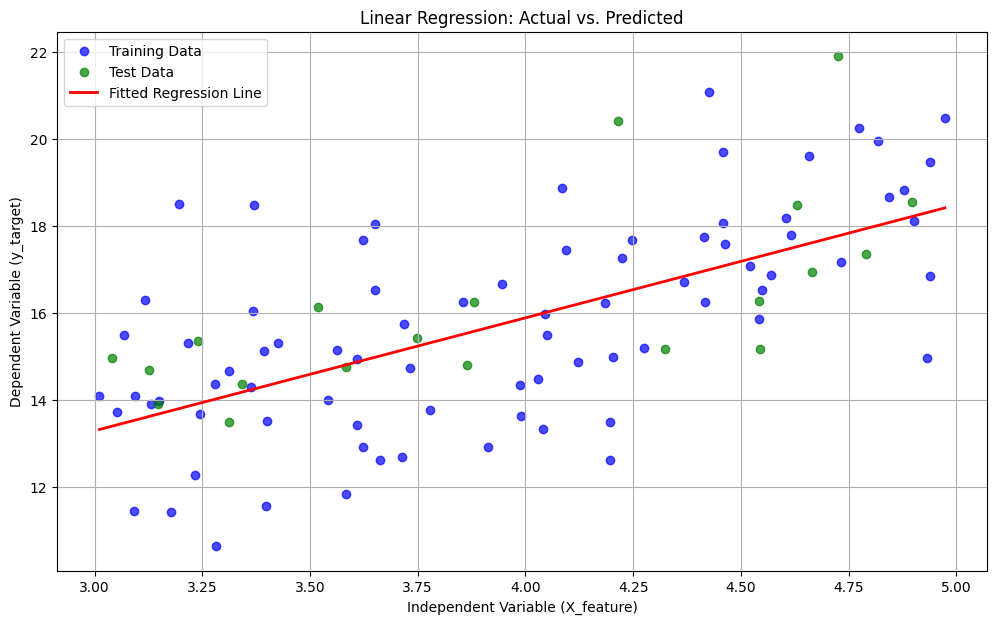

In [12]:
# Visualization of the Regression Line
# Let's plot the original data points and the regression line learned by the model.

plt.figure(figsize=(12, 7))

# Scatter plot for training data
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.7)

# Scatter plot for test data
plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.7)

# Plot the regression line using test X values and their predictions
# plt.plot(X_test, y_pred_test, color='red', linewidth=2, label='Regression Line (on Test Data)')

# For a smoother line across the entire range of X:
# Create a sequence of X values from min to max of the original X_skl
X_line = np.linspace(X_skl['X_feature'].min(), X_skl['X_feature'].max(), 100).reshape(-1, 1)
y_line_pred = linear_reg_model.predict(X_line) # Predictions using the overall X range
plt.plot(X_line, y_line_pred, color='red', linestyle='-', linewidth=2, label='Fitted Regression Line')


plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Independent Variable (X_feature)')
plt.ylabel('Dependent Variable (y_target)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Interpreting the Results
# The coefficient (slope) indicates how much the dependent variable (y_target)
# is expected to change for a one-unit change in the independent variable (X_feature).
# The intercept is the predicted value of y_target when X_feature is 0.
# The R-squared value tells us the percentage of variance in y_target explained by X_feature.
# For our synthetic data, we expect a relatively high R-squared value if the noise wasn't too large.

print("--- Interpretation Example: ---")
if hasattr(linear_reg_model, 'coef_') and len(linear_reg_model.coef_) > 0:
    print(f"For a one-unit increase in X_feature, the y_target is expected to "
          f"{'increase' if linear_reg_model.coef_[0] > 0 else 'decrease'} "
          f"by approximately {abs(linear_reg_model.coef_[0]):.2f} units.")
else:
    print("Coefficient not found or model not trained properly.")

if hasattr(linear_reg_model, 'intercept_'):
    print(f"When X_feature is 0, the predicted y_target is approximately {linear_reg_model.intercept_:.2f}.")
else:
    print("Intercept not found or model not trained properly.")

if 'r2' in locals(): # Check if r2 was calculated
    print(f"Approximately {r2*100:.2f}% of the variance in y_target can be explained by X_feature according to the R-squared value on the test set.")
else:
    print("R-squared value not calculated. Please ensure evaluation step ran correctly.")




--- Interpretation Example: ---
For a one-unit increase in X_feature, the y_target is expected to increase by approximately 2.60 units.
When X_feature is 0, the predicted y_target is approximately 5.49.
Approximately 42.03% of the variance in y_target can be explained by X_feature according to the R-squared value on the test set.
